In [62]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
from gensim.parsing.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim import corpora
import gensim

In [23]:
import pandas as pd

In [24]:
hotel_reviews=pd.read_csv('tripadvisor_hotel_reviews.csv')
hotel_reviews

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
295,cozy lodge like reviewers site boyfriend ended...,4
296,terrible accomodations ruined impression seatt...,1
297,"waterview room balcony worth money, husband st...",4
298,"come, husband visited seattle time dec. 2006. ...",5


Task 1: Conduct EDA on this dataset

/var/folders/53/1_08_22s37n3r4dm51m_8m7c0000gn/T/ipykernel_14474/814805733.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(hotel_reviews['Rating']).plot.bar(title="Rating Distribution")


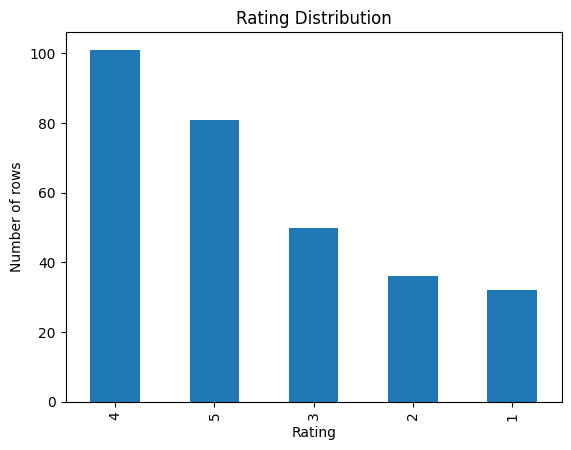

In [38]:
#group ratings
import matplotlib.pyplot as plt
plt.figure()
pd.value_counts(hotel_reviews['Rating']).plot.bar(title="Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of rows")
plt.show()

In [25]:
reviews=hotel_reviews['Review'].tolist()

In [39]:
#conduct word map analysis

In [40]:
porter_stemmer = PorterStemmer()
stopwordss=stopwords.words('english')
def clean(doc): 
    corpus=[]
    for word in doc: 
        words = word_tokenize(word)
        for word in words:
          if word not in stopwordss and not word.isdigit():
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation]) 
            if len(punc_free)>2 and not word.isdigit():
                corpus.append(porter_stemmer.stem(punc_free))
    return corpus
reviews_cleaned=clean(reviews)

In [66]:
# reviews_cleaned

In [67]:
freq_dist=FreqDist(reviews_cleaned)
freq_dist

FreqDist({'hotel': 774, 'room': 720, 'stai': 431, 'great': 303, 'seattl': 256, 'locat': 255, 'staff': 224, 'night': 202, 'nice': 192, 'place': 182, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

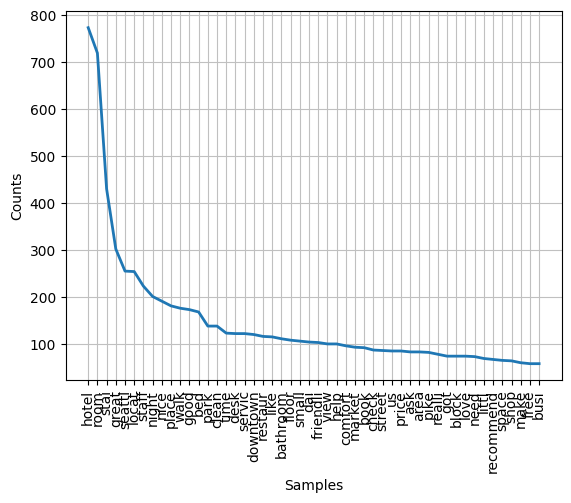

In [30]:
freq_dist.plot(50, cumulative=False)

In [41]:
# pip install wordcloud

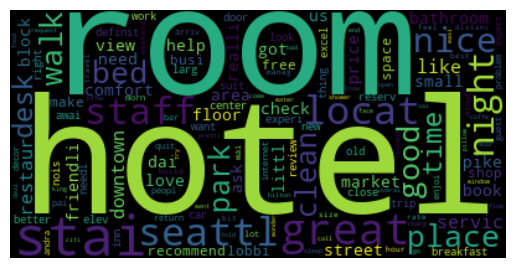

In [34]:
from wordcloud import WordCloud
cloud=WordCloud().generate_from_frequencies(freq_dist)
import matplotlib.pyplot as plt
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Task 2: Conduct Topic Modelling
- train an lda model
- identify topic
- visualise

In [42]:
hotel_reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [51]:
porter_stemmer = PorterStemmer()
stopwordss=stopwords.words('english')
exclude=set(string.punctuation)
from nltk.stem.wordnet import WordNetLemmatizer
lemma=WordNetLemmatizer()
def clean(doc):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude]) #remove punctuations
    stop_free = ' '.join([i for i in punc_free.split() if i not in stopwordss]) #remove stopwords
    normalized = ' '.join(lemma.lemmatize(word) for word in stop_free.split()) #lemmatisation
    stemmed = ' '.join(porter_stemmer.stem(word) for word in normalized.split())
    return normalized

hotel_reviews["preprocessed_review"] = hotel_reviews['Review'].apply(lambda x : clean(x).split())

In [52]:
hotel_reviews.head()

,Review,Rating,preprocessed_review
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, room, 4, experience, hotel, monaco, sea..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game..."


In [54]:
corpus=hotel_reviews['preprocessed_review'].values.tolist()

In [60]:
dictionary = corpora.Dictionary(corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

In [63]:
topic_num = 5
word_num = 5

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary, passes=20)

In [65]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.101326  0.002369       1        1  51.163232
4     -0.056769  0.006884       2        1  19.432977
1     -0.017621 -0.010011       3        1  15.568169
2      0.085566 -0.084209       4        1   8.568371
3      0.090150  0.084967       5        1   5.267250, topic_info=          Term        Freq       Total Category  logprob  loglift
55        room  618.000000  618.000000  Default  30.0000  30.0000
29       hotel  680.000000  680.000000  Default  29.0000  29.0000
121       desk  100.000000  100.000000  Default  28.0000  28.0000
203      staff  193.000000  193.000000  Default  27.0000  27.0000
1154  elevator   41.000000   41.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
295         nt    3.183952  200.521959   Topic5  -6.0012  -1.1991
16        door    2.798104   42.408332   Topic5  -6.1304   0.2253
332        way    2.658351   36.808425   Topic5  -6.1816   0.3156
74           4    2.588660   28.989539   Topic5  -6.2082   0.5279
379       time    2.631002  107.745548   Topic5  -6.1920  -0.7687

[412 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
72        1  0.526900         2
72        2  0.271433         2
72        3  0.111767         2
72        4  0.047900         2
72        5  0.047900         2
...     ...       ...       ...
332       3  0.135838       way
332       4  0.135838       way
332       5  0.081503       way
1083      1  0.981671  westlake
4262      3  0.957664      york

[745 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 4])